In [67]:
import pandas as pd

df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Configuration de l'affichage pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

# Extraire toutes les colonnes avec leurs types
colonnes_types = df.dtypes

print(colonnes_types)


OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

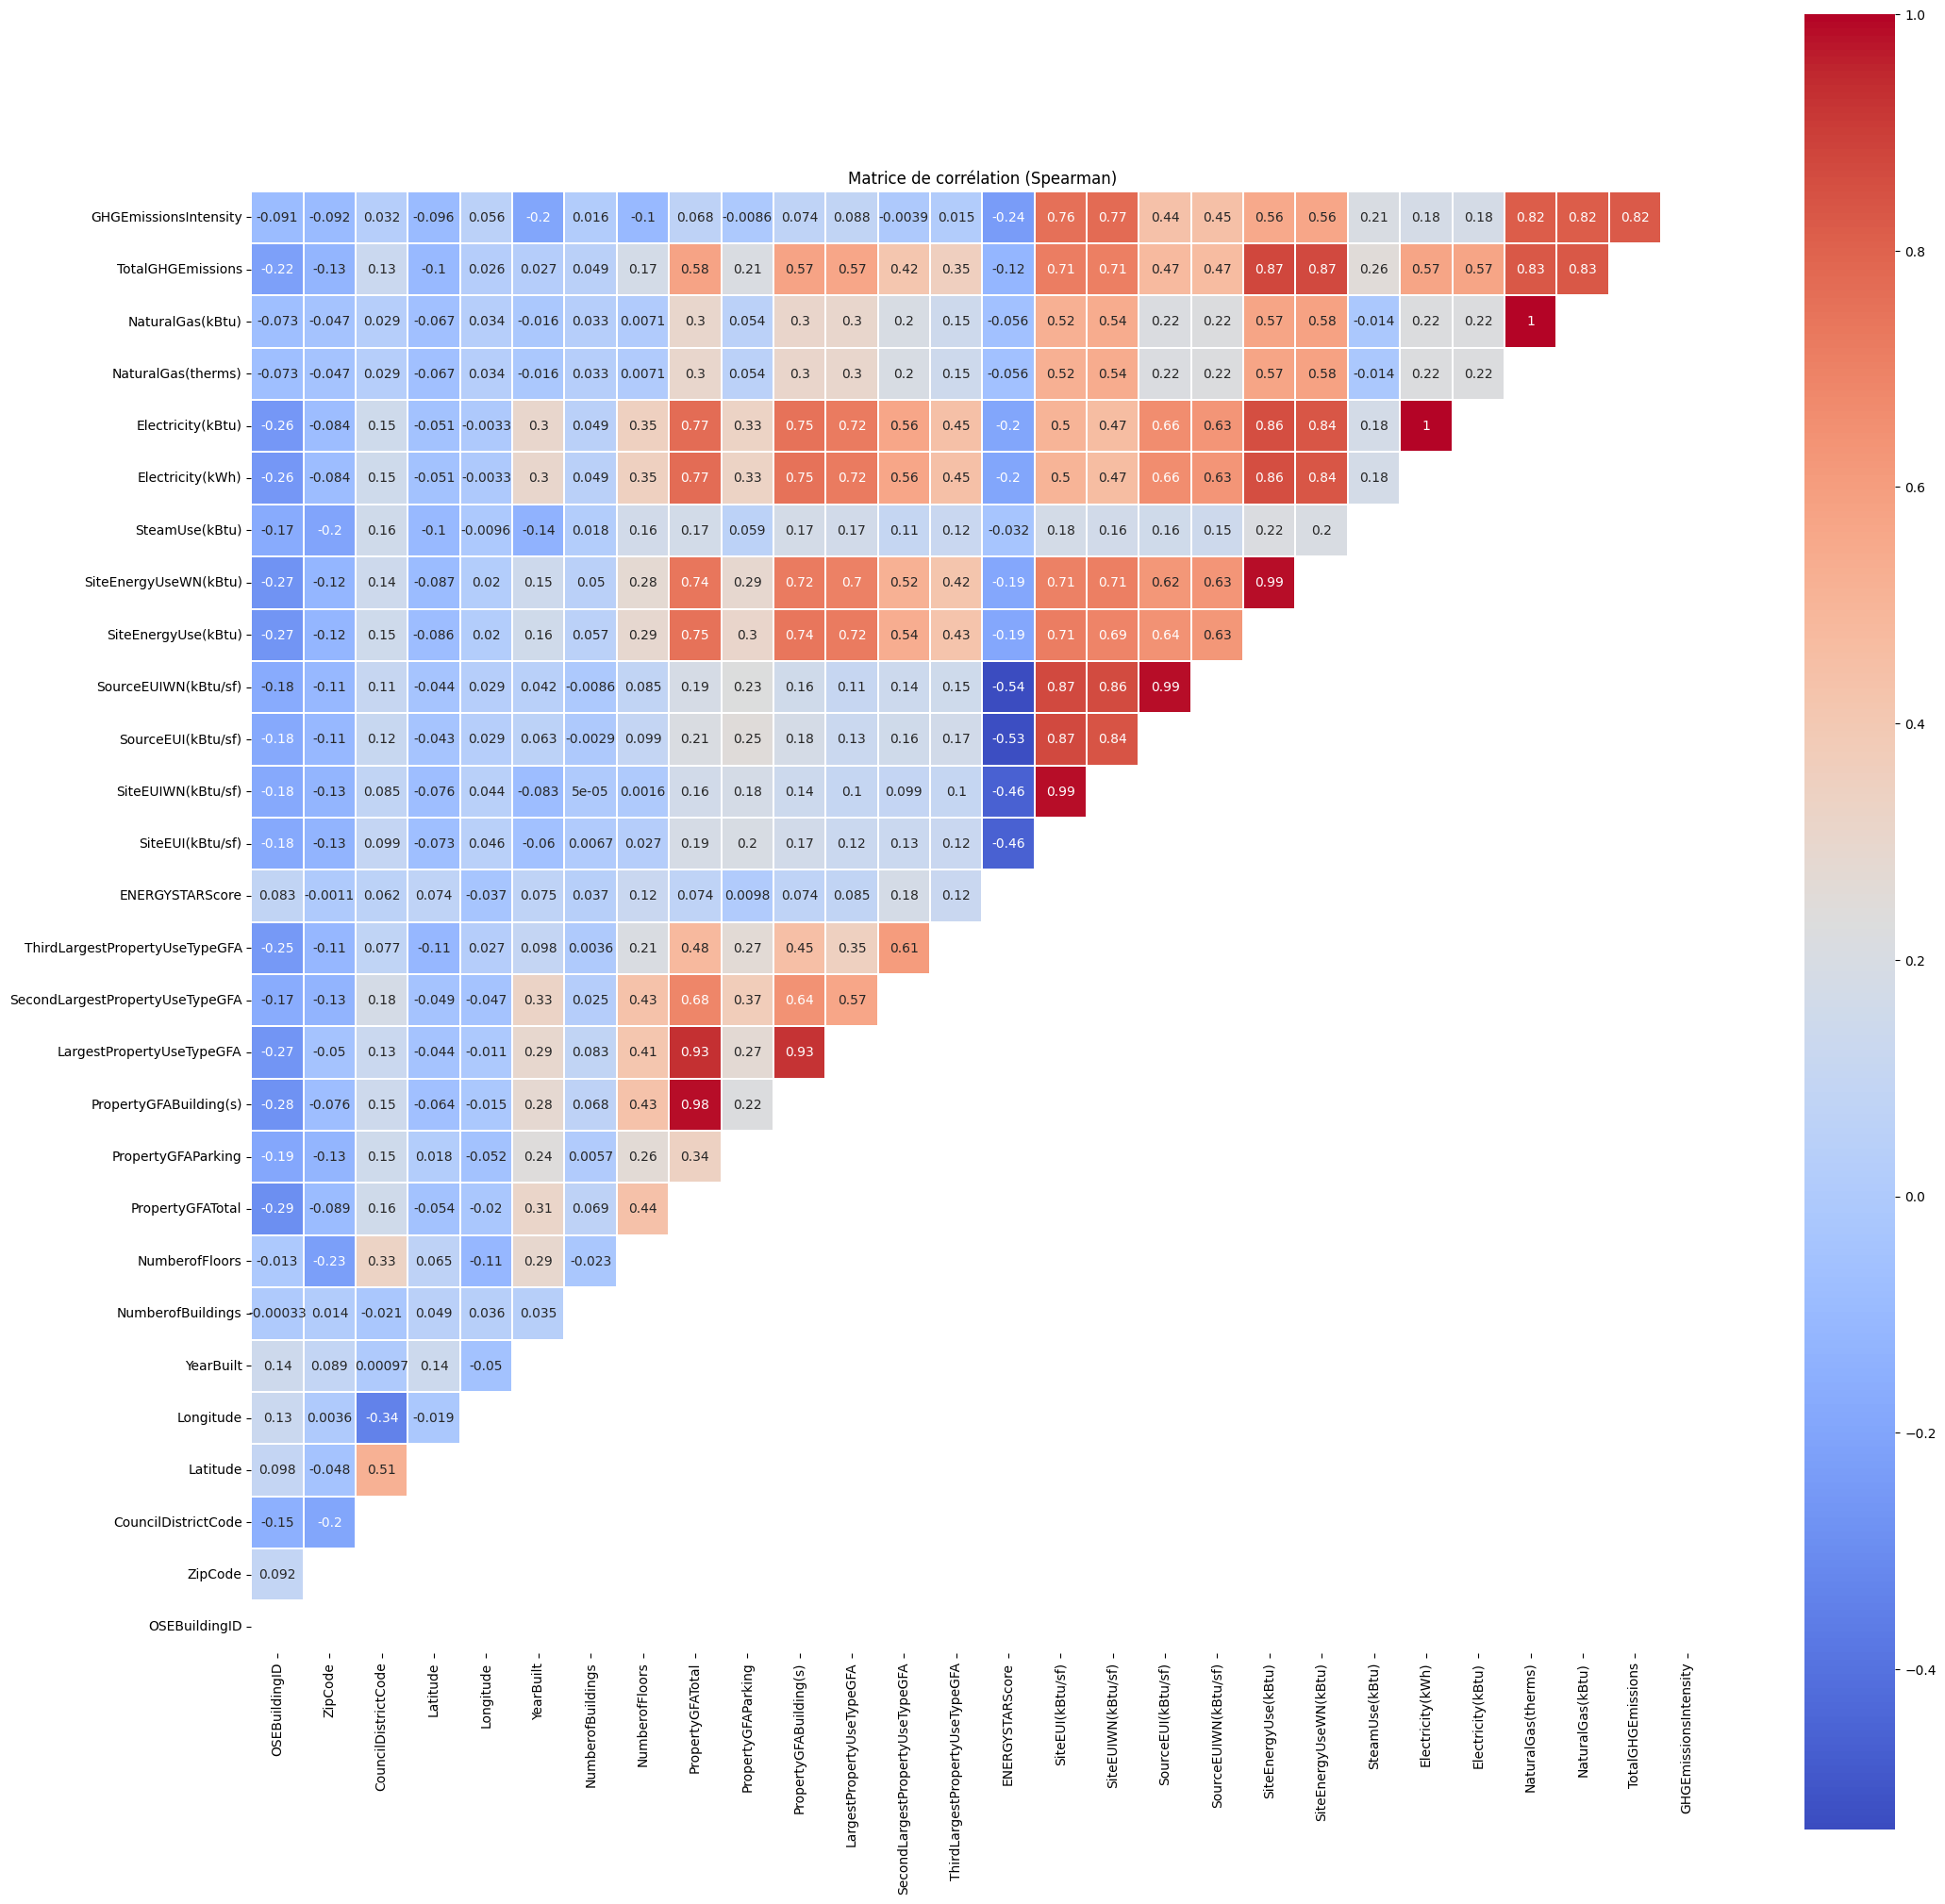

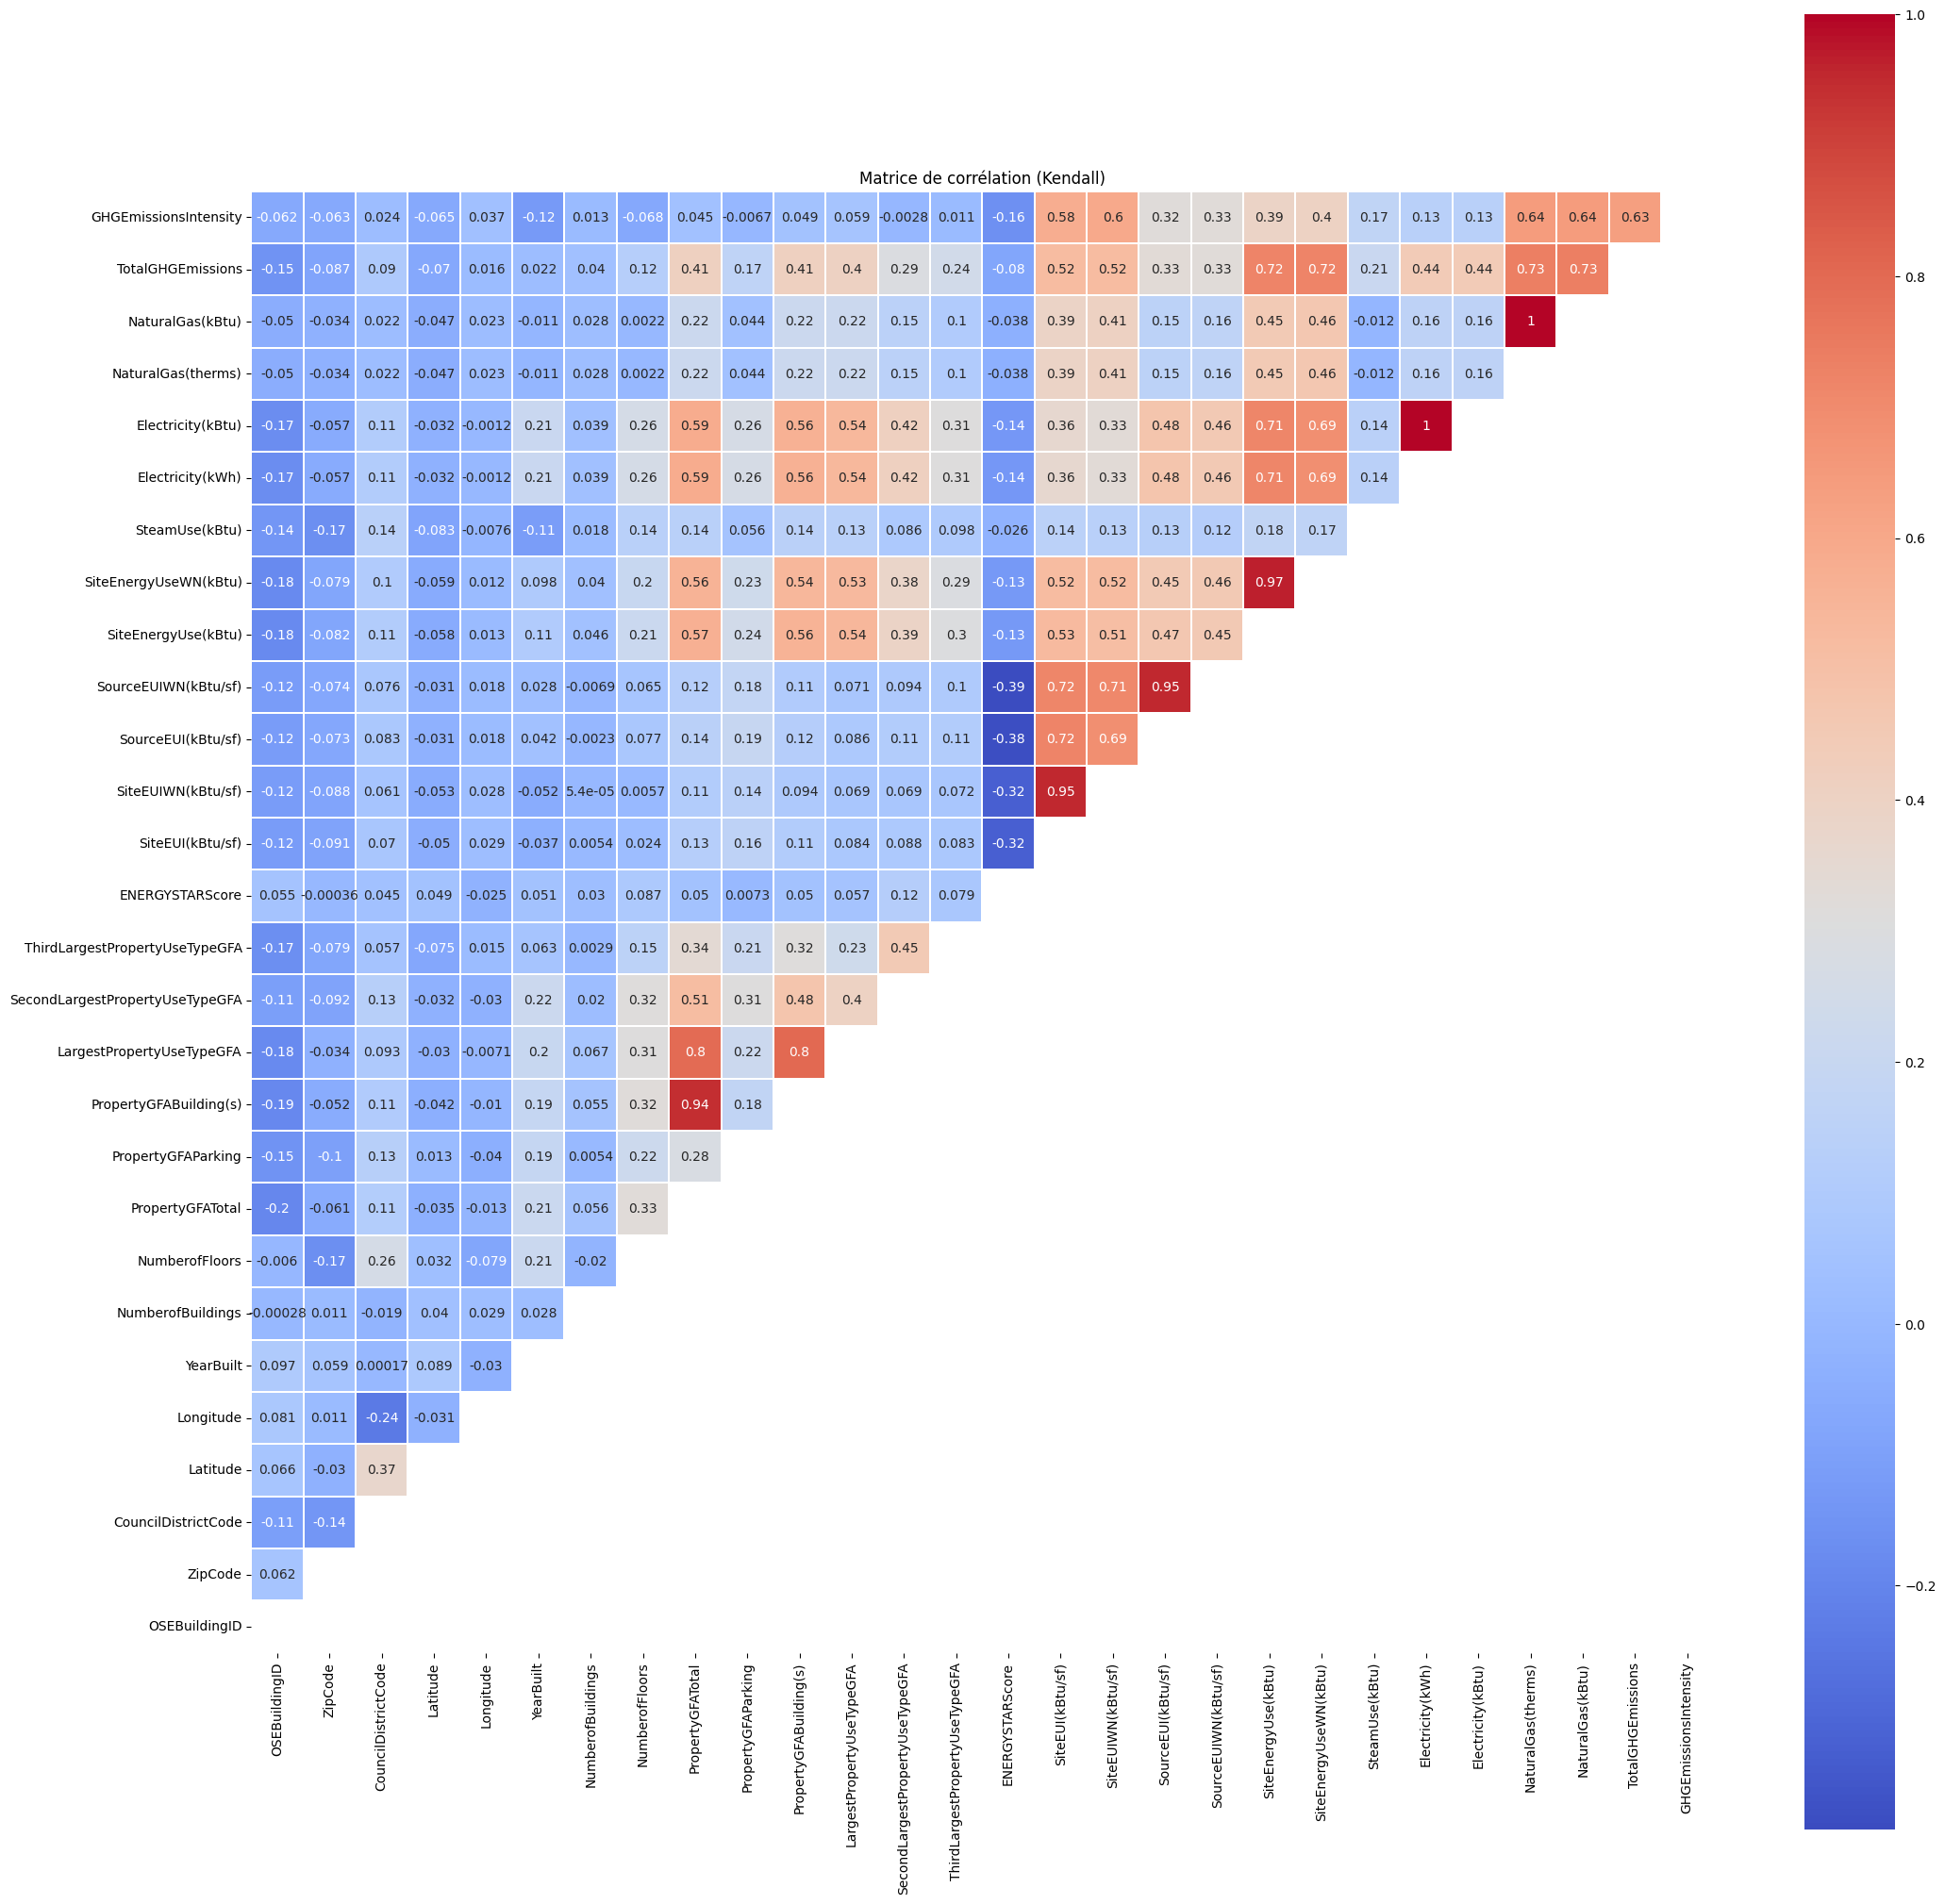

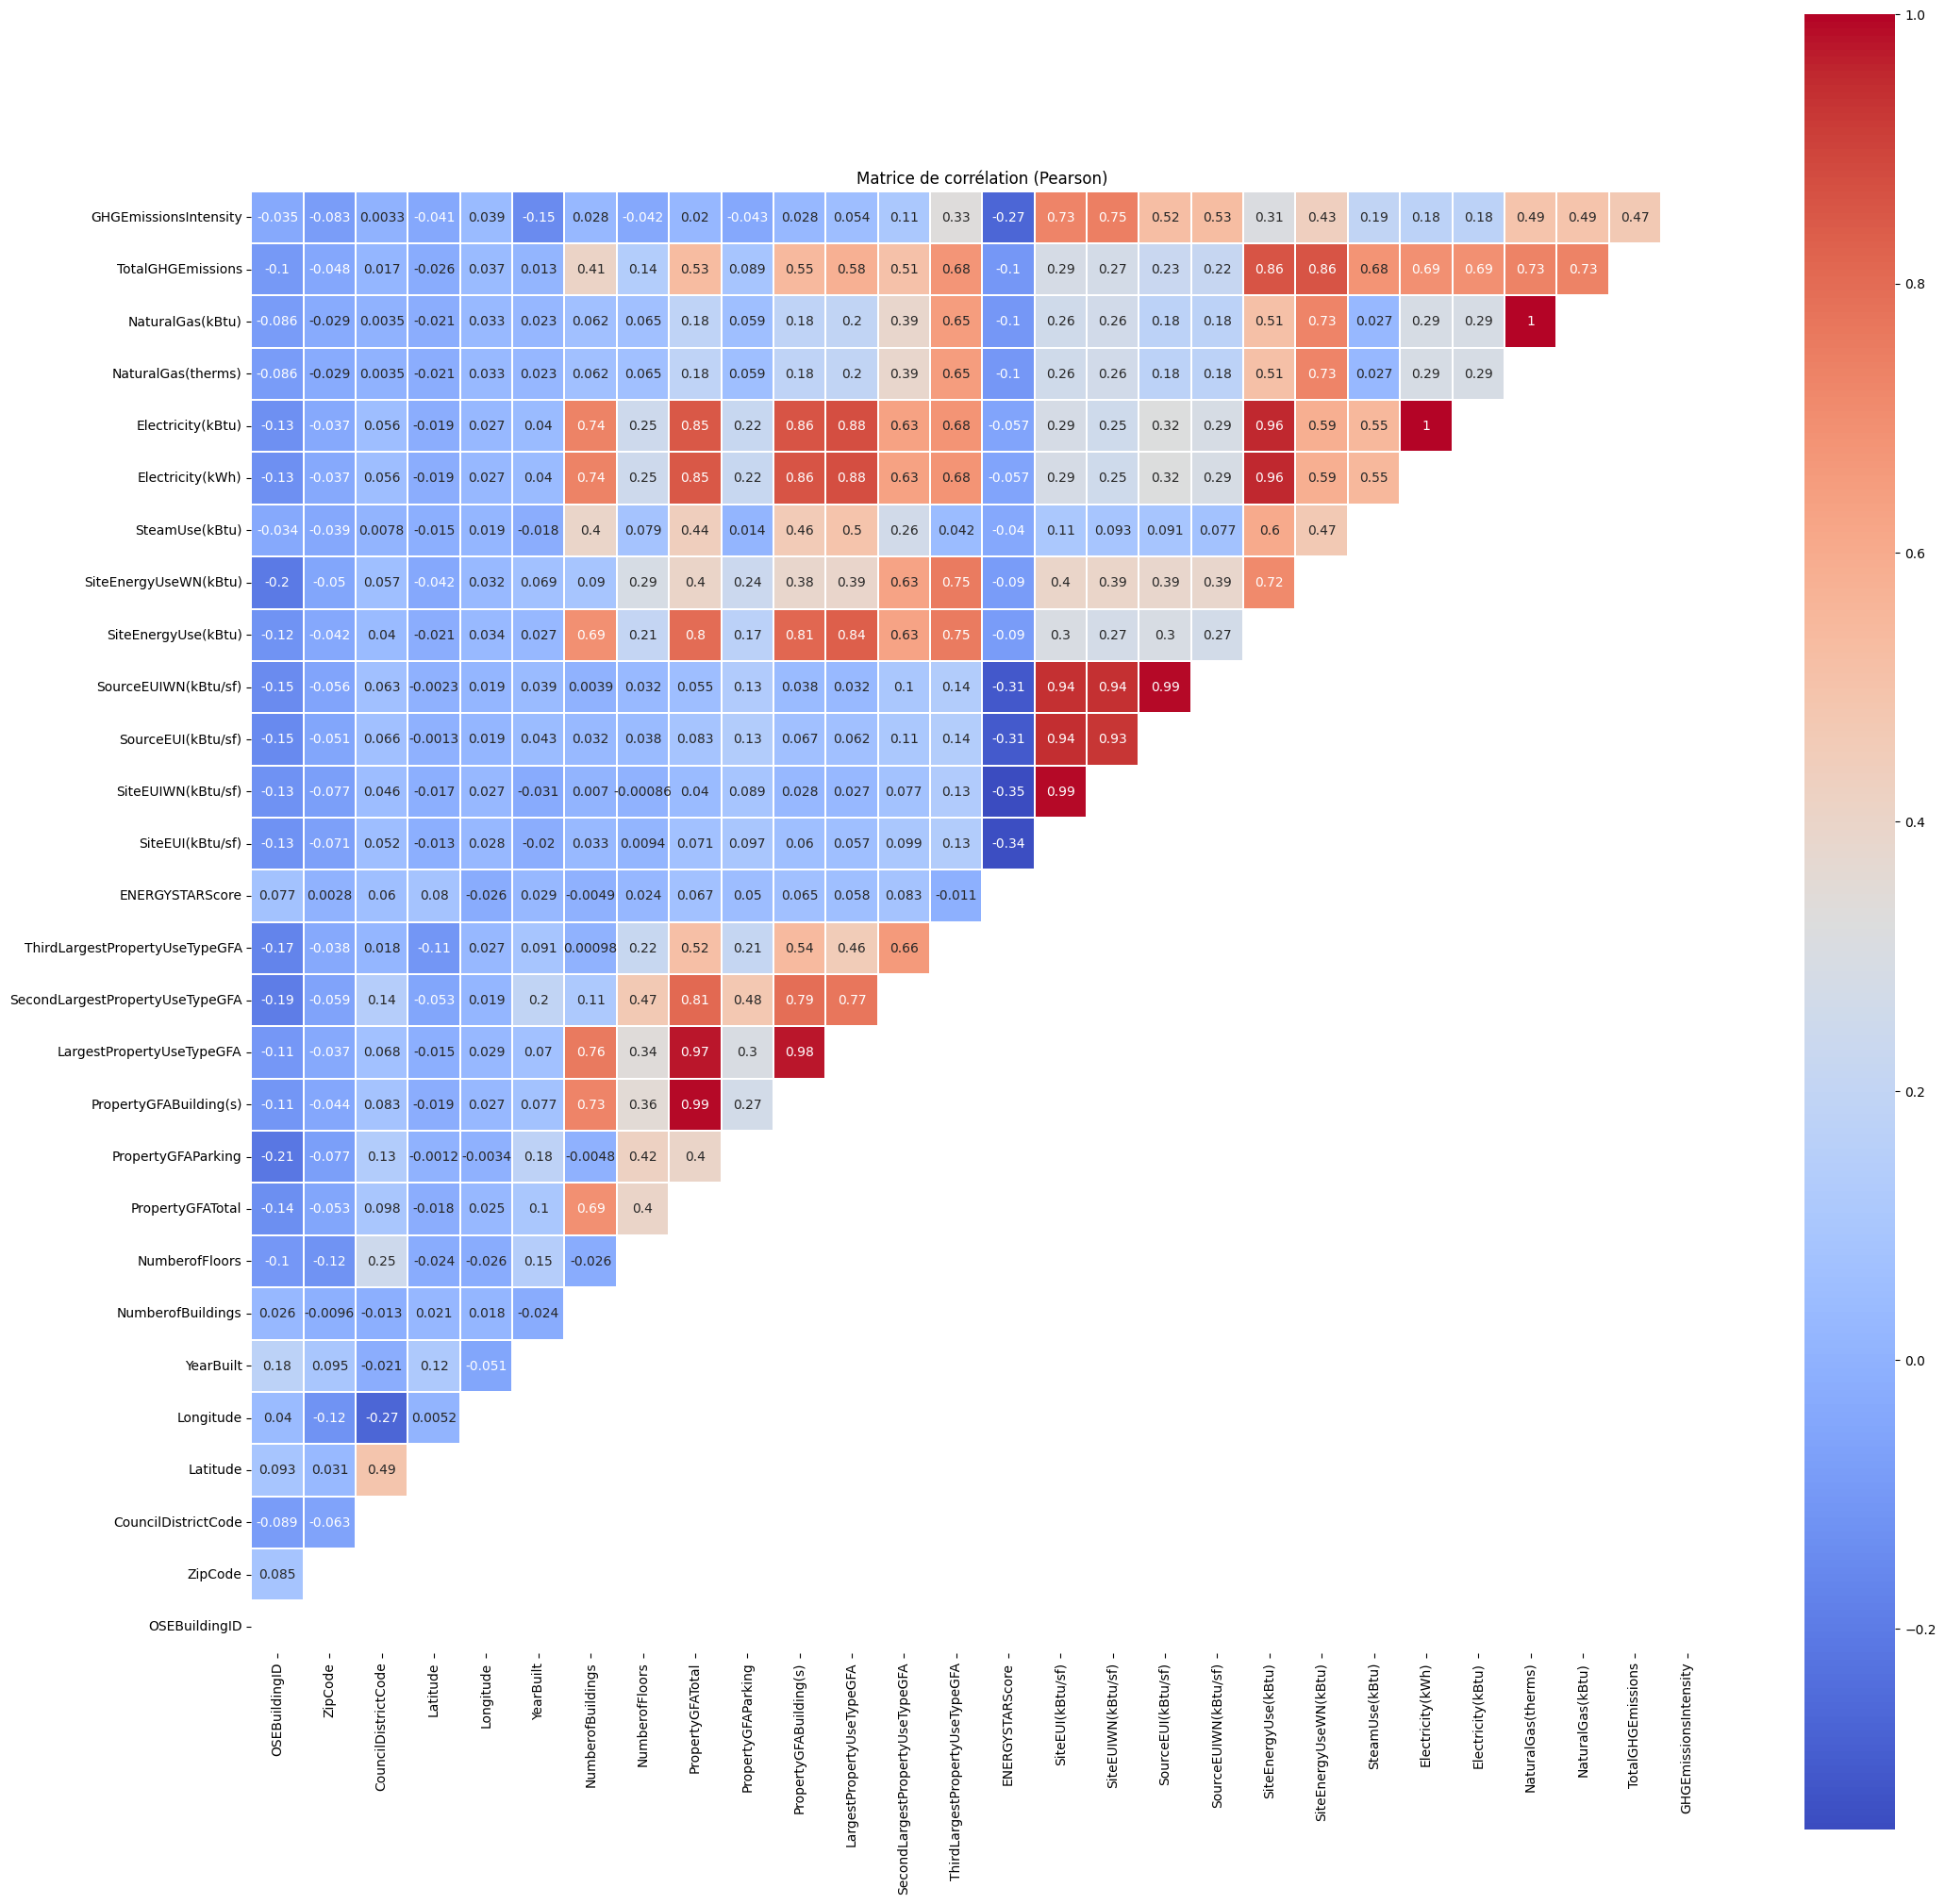

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données dans un DataFrame
data = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Supprimer les colonnes 'Comments' et 'DataYear'
data = data.drop(['Comments', 'DataYear'], axis=1)

# Sélectionner uniquement les colonnes numériques
data_numerical = data.select_dtypes(include=[np.number])

# Méthodes de corrélation
correlation_methods = ['spearman', 'kendall', 'pearson']

# Boucle pour afficher les matrices de corrélation pour chaque méthode
for method in correlation_methods:
    # Calculer la matrice de corrélation
    corr_matrix = data_numerical.corr(method=method)

    # Créer une figure
    fig = plt.figure(figsize=(25, 25))

    # Générer un masque pour la partie supérieure du triangle
    mask = np.zeros_like(corr_matrix, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True

    # Dessiner la heatmap avec seaborn en utilisant la palette 'coolwarm'
    sns.heatmap(corr_matrix, mask=mask, square=True, linewidths=0.1, annot=True, cmap='coolwarm')

    # Définir les limites des axes
    plt.xlim(0, corr_matrix.shape[1])
    plt.ylim(0, corr_matrix.shape[0])

    # Titre de la heatmap
    plt.title(f"Matrice de corrélation ({method.capitalize()})")

    # Afficher la figure
    plt.show()


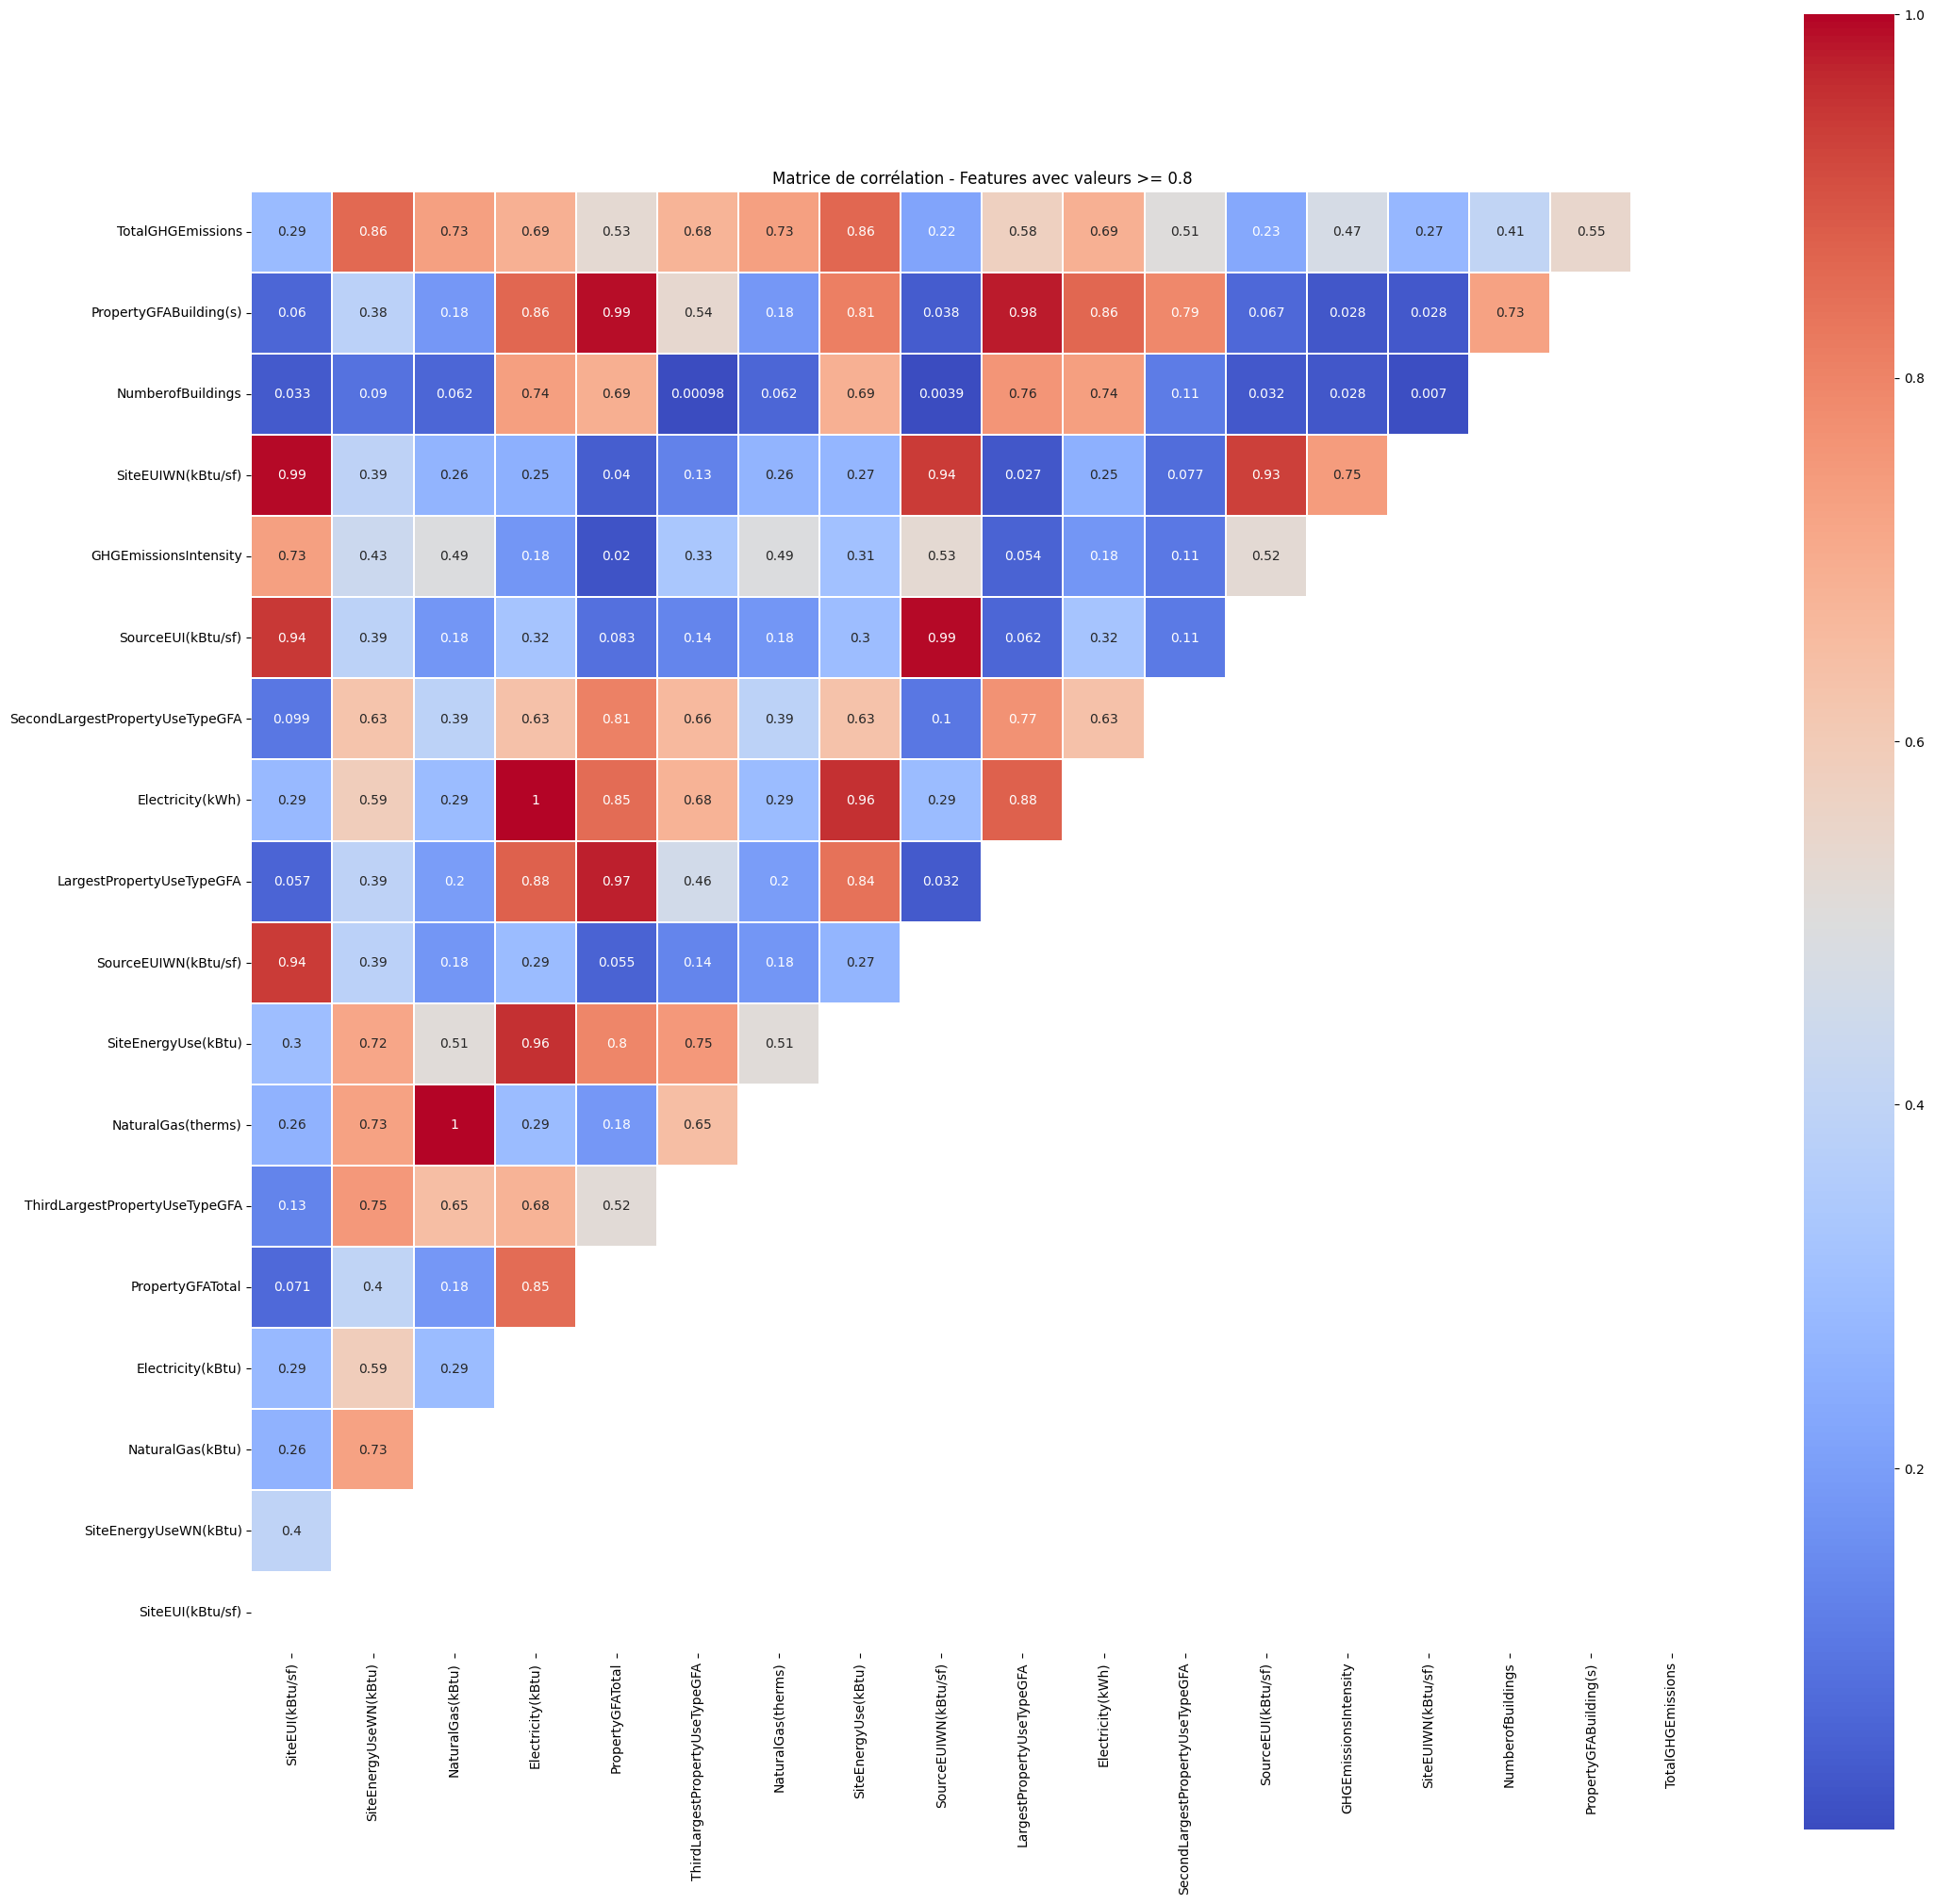

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données dans un DataFrame
data = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Supprimer les colonnes 'Comments' et 'DataYear'
data = data.drop(['Comments', 'DataYear'], axis=1)

# Sélectionner uniquement les colonnes numériques
data_numerical = data.select_dtypes(include=[np.number])

# Méthodes de corrélation
correlation_methods = ['spearman', 'kendall', 'pearson']

# Créer une liste pour stocker les features à garder
features_to_keep = []

# Boucle pour calculer les corrélations et les features à garder
for method in correlation_methods:
    # Calculer la matrice de corrélation
    corr_matrix = data_numerical.corr(method=method)

    # Filtrer les features ayant au moins une valeur supérieure ou égale à 0.8
    # En mettant la diagonale à 0, on s'assure de ne pas compter la corrélation d'une colonne avec elle-même
    np.fill_diagonal(corr_matrix.values, 0)
    
    features = corr_matrix.columns[(corr_matrix.abs() >= 0.7).any()]

    # Ajouter les features à garder à la liste
    features_to_keep.extend(features)

# Supprimer les doublons de la liste des features à garder
features_to_keep = list(set(features_to_keep))

# Filtrer le DataFrame avec les features à garder
data_filtered = data[features_to_keep]

# Calculer la matrice de corrélation avec les features filtrées
corr_matrix_filtered = data_filtered.corr()

# Créer une figure
fig = plt.figure(figsize=(25, 25))

# Générer un masque pour la partie supérieure du triangle
mask = np.zeros_like(corr_matrix_filtered, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Dessiner la heatmap avec seaborn en utilisant la palette 'coolwarm'
sns.heatmap(corr_matrix_filtered, mask=mask, square=True, linewidths=0.1, annot=True, cmap='coolwarm')

# Définir les limites des axes
plt.xlim(0, corr_matrix_filtered.shape[1])
plt.ylim(0, corr_matrix_filtered.shape[0])

# Titre de la heatmap
plt.title("Matrice de corrélation - Features avec valeurs >= 0.8")

# Afficher la figure
plt.show()


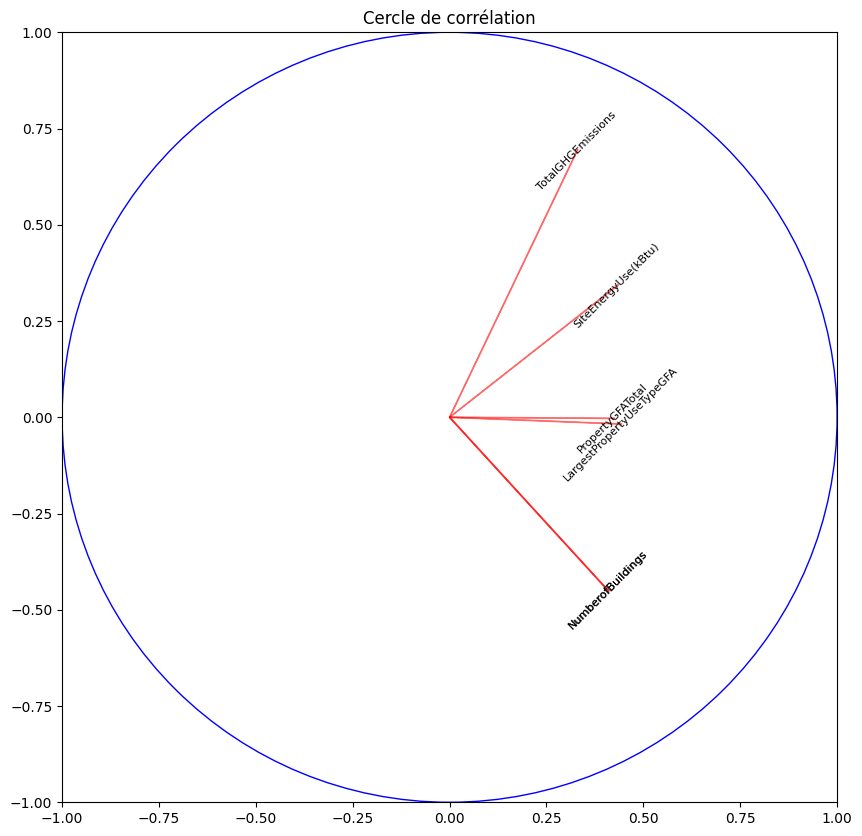

In [4]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger les données dans un DataFrame
data = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Supprimer les colonnes 'Comments' et 'DataYear'
data = data.drop(['Comments', 'DataYear'], axis=1)

# Sélectionner uniquement les colonnes spécifiées
selected_columns = ['LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'NumberofBuildings', 'PropertyGFATotal', 'NumberofBuildings']
data_filtered = data[selected_columns]

# Supprimer les valeurs manquantes
data_filtered = data_filtered.dropna()

# Normaliser les données
scaler = StandardScaler()
data_norm = scaler.fit_transform(data_filtered)

# Faire l'ACP
pca = PCA()
data_pca = pca.fit_transform(data_norm)

# Récupérer les deux premières composantes principales
pca1, pca2 = pca.components_[:2]

# Créer la figure avec une taille plus grande
plt.figure(figsize=(10, 10))

# Dessiner le cercle
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Dessiner les vecteurs de corrélation avec des labels plus petits et tournés
for i, (x, y) in enumerate(zip(pca1, pca2)):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)
    plt.text(x, y, data_filtered.columns[i], color='black', ha='center', va='center', size=8, rotation=45)

# Définir les limites des axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Titre du cercle de corrélation
plt.title("Cercle de corrélation")

# Afficher la figure
plt.show()


In [70]:
import pickle
import joblib
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Préparation des données
X = df[['LargestPropertyUseTypeGFA', 'PrimaryPropertyType']].copy()
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Drop les NaN values du dataset
df = pd.concat([X, y], axis=1).dropna()
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

# Preprocessing steps
log_transformer = FunctionTransformer(np.log, validate=True)
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()

# Set up ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['LargestPropertyUseTypeGFA']),
        ('one_hot', one_hot_encoder, ['PrimaryPropertyType'])
    ])

# Models and their param grids
models = [
    ("Random Forest", RandomForestRegressor(), {'model__n_estimators': [100, 200, 300], 'model__max_depth': [None, 5, 10]}),
    ("Lasso", Lasso(), {'model__alpha': [0.1, 1, 10]}),
    ("XGBoost", XGBRegressor(), {'model__n_estimators': [100, 200, 300], 'model__max_depth': [None, 5, 10]}),
    ("Extra Trees", ExtraTreesRegressor(), {'model__n_estimators': [100, 200, 300], 'model__max_depth': [None, 5, 10]})
]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Pour stocker les résultats
results = []

# Loop over models
for name, model, params in models:
    # Pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('scaler', scaler), 
                               ('model', model)])
    
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=1, cv=5)
    random_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    # Predict
    y_pred = best_model.predict(X_test)
    
    # Scoring
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Stocker les résultats dans une liste
    results.append([name, r2, rmse])

# Créer un DataFrame à partir de la liste des résultats
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'RMSE'])

In [71]:
# Créer un graphique pour R2 Score
fig1 = go.Figure()

# Ajoutez chaque modèle comme une barre distincte avec une couleur unique
for i, model in enumerate(results_df['Model']):
    fig1.add_trace(go.Bar(
        x=[model],
        y=[results_df.loc[i, 'R2 Score']],
        name=model,
        marker_color=['#FF4136', '#2ECC40', '#FF851B', '#0074D9'][i]  # Utiliser une couleur différente pour chaque modèle
    ))

# Modifier l'aspect du graphique
fig1.update_layout(title_text='R2 Scores', yaxis_title='R2 Score')

# Afficher le graphique
fig1.show()

# Créer un graphique pour RMSE
fig2 = go.Figure()

# Ajoutez chaque modèle comme une barre distincte avec une couleur unique
for i, model in enumerate(results_df['Model']):
    fig2.add_trace(go.Bar(
        x=[model],
        y=[results_df.loc[i, 'RMSE']],
        name=model,
        marker_color=['#FF4136', '#2ECC40', '#FF851B', '#0074D9'][i]  # Utiliser une couleur différente pour chaque modèle
    ))

# Modifier l'aspect du graphique
fig2.update_layout(title_text='RMSE Scores', yaxis_title='RMSE')

# Afficher le graphique
fig2.show()


In [6]:
import pickle
import joblib
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Préparation des données
X = df[['LargestPropertyUseTypeGFA', 'PrimaryPropertyType']].copy()
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Drop les NaN values du dataset
df = pd.concat([X, y], axis=1).dropna()
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

# Preprocessing steps
log_transformer = FunctionTransformer(np.log, validate=True)
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()

# Set up ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['LargestPropertyUseTypeGFA']),
        ('one_hot', one_hot_encoder, ['PrimaryPropertyType'])
    ])

# Models and their param grids
models = [
    ("Extra Trees", ExtraTreesRegressor(), {'model__n_estimators': [100, 200, 300], 'model__max_depth': [None, 5, 10]})
]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Pour stocker les résultats
results = []

# Loop over models
for name, model, params in models:
    # Pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('scaler', scaler), 
                               ('model', model)])
    
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=1, cv=5)
    random_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    # Predict
    y_pred = best_model.predict(X_test)
    
    # Scoring
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Stocker les résultats dans une liste
    results.append([name, r2, rmse])

# Créer un DataFrame à partir de la liste des résultats
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'RMSE'])

print(results_df)

         Model  R2 Score          RMSE
0  Extra Trees  0.739766  6.680041e+06


In [7]:
# Créer un DataFrame à partir des valeurs réelles et prédites
df_pred_1 = pd.DataFrame({'Real values': y_test.iloc[:,0].squeeze(), 'Predicted values': y_pred[:,0]})
df_pred_2 = pd.DataFrame({'Real values': y_test.iloc[:,1].squeeze(), 'Predicted values': y_pred[:,1]})

# Créer un scatter plot pour 'SiteEnergyUse(kBtu)'
fig1 = go.Figure()

# Ajouter les valeurs réelles vs prédites
fig1.add_trace(
    go.Scatter(x=df_pred_1['Real values'], y=df_pred_1['Predicted values'], mode='markers', name='Valeurs prédites')
)

# Ajouter une ligne de référence y=x
fig1.add_trace(
    go.Scatter(x=df_pred_1['Real values'], y=df_pred_1['Real values'], mode='lines', name='Valeurs réelles')
)

# Modifier l'aspect du graphique
fig1.update_layout(title='Valeurs réelles vs Valeurs prédites', 
                  xaxis_title='Valeurs réelles', 
                  yaxis_title='Valeurs prédites', 
                  hovermode='x')

# Afficher le graphique
fig1.show()

# Créer un scatter plot pour 'TotalGHGEmissions'
fig2 = go.Figure()

# Ajouter les valeurs réelles vs prédites
fig2.add_trace(
    go.Scatter(x=df_pred_2['Real values'], y=df_pred_2['Predicted values'], mode='markers', name='Valeurs prédites')
)

# Ajouter une ligne de référence y=x
fig2.add_trace(
    go.Scatter(x=df_pred_2['Real values'], y=df_pred_2['Real values'], mode='lines', name='Valeurs réelles')
)

# Modifier l'aspect du graphique
fig2.update_layout(title='Valeurs réelles vs Valeurs prédites', 
                  xaxis_title='Valeurs réelles', 
                  yaxis_title='Valeurs prédites', 
                  hovermode='x')

# Afficher le graphique
fig2.show()


In [65]:
import pickle
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Préparation des données
X = df[['LargestPropertyUseTypeGFA', 'PrimaryPropertyType']].copy()
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Ajouter une petite constante aux colonnes avant d'appliquer le logarithme
X[['LargestPropertyUseTypeGFA']] += 0.01
y += 0.01

# Appliquer le log sur les targets
y_log = np.log(y)

# Drop les NaN values du dataset
df = pd.concat([X, y_log], axis=1).dropna()
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y_log = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

# Preprocessing steps
log_transformer = FunctionTransformer(np.log, validate=True)
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()

# Set up ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['LargestPropertyUseTypeGFA']),
        ('one_hot', one_hot_encoder, ['PrimaryPropertyType'])
    ])

# Models and their param grids
models = [
    ("Extra Trees", ExtraTreesRegressor(), {'model__estimator__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500],
                                            'model__estimator__max_depth': [None, 5, 10, 15, 20, 25, 30]})
]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# To store results
results = []

# Loop over models
for name, model, params in models:
    # Pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('scaler', scaler), 
                               ('model', MultiOutputRegressor(model))])  # wrap your model with MultiOutputRegressor
    
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=2, cv=5, random_state=42)
    random_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = random_search.best_estimator_
    
    # Fit the model on the training data
    best_model.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Apply inverse transformation on predictions and clip the values
    y_train_pred = np.exp(y_train_pred)
    y_train_pred = np.clip(y_train_pred, 0, None)  # Clip negative values to 0
    y_test_pred = np.exp(y_test_pred)
    y_test_pred = np.clip(y_test_pred, 0, None)  # Clip negative values to 0

    # Calculate R2 scores and RMSE for each target separately
    for i, target in enumerate(y.columns):
        r2_train = r2_score(y_train.iloc[:, i], y_train_pred[:, i])
        r2_test = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
        rmse_train = mean_squared_error(y_train.iloc[:, i], y_train_pred[:, i], squared=False)
        rmse_test = mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i], squared=False)
        print(f"Model: {name}")
        print(f"Target: {target}")
        print(f"R2 Score (Training): {r2_train}")
        print(f"R2 Score (Testing): {r2_test}")
        print(f"RMSE (Training): {rmse_train}")
        print(f"RMSE (Testing): {rmse_test}")
        print("------------------------")
        results.append([name, target, r2_train, rmse_train, r2_test, rmse_test])


# Create a DataFrame from the list of results
results_df = pd.DataFrame(results, columns=['Model', 'Target', 'R2 Score (Training)', 'RMSE (Training)', 'R2 Score (Testing)', 'RMSE (Testing)'])

print(results_df)

Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): -61413896771068.82
R2 Score (Testing): -30435392259194.496
RMSE (Training): 14086951.264572272
RMSE (Testing): 10460542.273310754
------------------------
Model: Extra Trees
Target: TotalGHGEmissions
R2 Score (Training): -57456.81190063711
R2 Score (Testing): -80315.08120118726
RMSE (Training): 375.63280327181263
RMSE (Testing): 436.8525570538137
------------------------
         Model               Target  R2 Score (Training)  RMSE (Training)  \
0  Extra Trees  SiteEnergyUse(kBtu)        -6.141390e+13     1.408695e+07   
1  Extra Trees    TotalGHGEmissions        -5.745681e+04     3.756328e+02   

   R2 Score (Testing)  RMSE (Testing)  
0       -3.043539e+13    1.046054e+07  
1       -8.031508e+04    4.368526e+02  


In [62]:
import pickle
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Préparation des données
X = df[['LargestPropertyUseTypeGFA', 'PrimaryPropertyType']].copy()
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Ajouter une petite constante aux colonnes avant d'appliquer le logarithme
X[['LargestPropertyUseTypeGFA']] += 0.01

# Drop les NaN values du dataset
df = pd.concat([X, y], axis=1).dropna()
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

# Preprocessing steps
log_transformer = FunctionTransformer(np.log, validate=True)
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()

# Set up ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['LargestPropertyUseTypeGFA']),
        ('one_hot', one_hot_encoder, ['PrimaryPropertyType'])
    ])

# Models and their param grids
models = [
    ("Extra Trees", ExtraTreesRegressor(), {'model__estimator__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500],
                                            'model__estimator__max_depth': [None, 5, 10, 15, 20, 25, 30]})
]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To store results
results = []

# Loop over models
for name, model, params in models:
    # Pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('scaler', scaler), 
                               ('model', MultiOutputRegressor(model))])  # wrap your model with MultiOutputRegressor
    
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=10, cv=5, random_state=42)
    random_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = random_search.best_estimator_
    
    # Fit the model on the training data
    best_model.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Calculate R2 scores and RMSE for each target separately
    for i, target in enumerate(y.columns):
        r2_train = r2_score(y_train.iloc[:, i], y_train_pred[:, i])
        r2_test = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
        rmse_train = mean_squared_error(y_train.iloc[:, i], y_train_pred[:, i], squared=False)
        rmse_test = mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i], squared=False)
        print(f"Model: {name}")
        print(f"Target: {target}")
        print(f"R2 Score (Training): {r2_train}")
        print(f"R2 Score (Testing): {r2_test}")
        print(f"RMSE (Training): {rmse_train}")
        print(f"RMSE (Testing): {rmse_test}")
        print("------------------------")
        results.append([name, target, r2_train, rmse_train, r2_test, rmse_test])

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results, columns=['Model', 'Target', 'R2 Score (Training)', 'RMSE (Training)', 'R2 Score (Testing)', 'RMSE (Testing)'])

print(results_df)


Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): 0.9983684043242766
R2 Score (Testing): 0.5488207434404077
RMSE (Training): 888097.2341924679
RMSE (Testing): 13611594.908877077
------------------------
Model: Extra Trees
Target: TotalGHGEmissions
R2 Score (Training): 0.9951989621422729
R2 Score (Testing): 0.9115361969401398
RMSE (Training): 36.80308610920598
RMSE (Testing): 170.0931527957669
------------------------
         Model               Target  R2 Score (Training)  RMSE (Training)  \
0  Extra Trees  SiteEnergyUse(kBtu)             0.998368    888097.234192   
1  Extra Trees    TotalGHGEmissions             0.995199        36.803086   

   R2 Score (Testing)  RMSE (Testing)  
0            0.548821    1.361159e+07  
1            0.911536    1.700932e+02  


In [ ]:
# Sauvegarder le meilleur modèle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Sauvegarder le scaler
with open('best_scaler.pkl', 'wb') as file:
    joblib.dump(scaler, file)

In [74]:
import pickle
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Préparation des données
X = df[['LargestPropertyUseTypeGFA', 'PrimaryPropertyType']].copy()
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Ajouter une petite constante aux colonnes avant d'appliquer le logarithme
X[['LargestPropertyUseTypeGFA']] += 0.01

# Drop les NaN values du dataset
df = pd.concat([X, y], axis=1).dropna()
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

# Preprocessing steps
log_transformer = FunctionTransformer(np.log, validate=True)
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()

# Set up ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['LargestPropertyUseTypeGFA']),
        ('one_hot', one_hot_encoder, ['PrimaryPropertyType'])
    ])

# Models and their param grids
models = [
    ("Extra Trees", ExtraTreesRegressor(), {'model__estimator__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500],
                                            'model__estimator__max_depth': [None, 5, 10, 15, 20, 25, 30]})
]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To store results
results = []

# Loop over models
for name, model, params in models:
    # Pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('scaler', scaler), 
                               ('model', MultiOutputRegressor(model))])  # wrap your model with MultiOutputRegressor
    
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=5, cv=5, random_state=42)
    random_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = random_search.best_estimator_
    
    # Fit the model on the training data
    best_model.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Calculate R2 scores and RMSE for each target separately
    for i, target in enumerate(y.columns):
        r2_train = r2_score(y_train.iloc[:, i], y_train_pred[:, i])
        r2_test = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
        rmse_train = mean_squared_error(y_train.iloc[:, i], y_train_pred[:, i], squared=False)
        rmse_test = mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i], squared=False)
        print(f"Model: {name}")
        print(f"Target: {target}")
        print(f"R2 Score (Training): {r2_train}")
        print(f"R2 Score (Testing): {r2_test}")
        print(f"RMSE (Training): {rmse_train}")
        print(f"RMSE (Testing): {rmse_test}")
        print("------------------------")
        results.append([name, target, r2_train, rmse_train, r2_test, rmse_test])

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results, columns=['Model', 'Target', 'R2 Score (Training)', 'RMSE (Training)', 'R2 Score (Testing)', 'RMSE (Testing)'])

print(results_df)


Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): 0.9984209251315684
R2 Score (Testing): 0.5508774148832112
RMSE (Training): 873686.4605637285
RMSE (Testing): 13580535.685826946
------------------------
Model: Extra Trees
Target: TotalGHGEmissions
R2 Score (Training): 0.9948634264902421
R2 Score (Testing): 0.9139019466916162
RMSE (Training): 38.06741848049685
RMSE (Testing): 167.8033761091243
------------------------
         Model               Target  R2 Score (Training)  RMSE (Training)  \
0  Extra Trees  SiteEnergyUse(kBtu)             0.998421    873686.460564   
1  Extra Trees    TotalGHGEmissions             0.994863        38.067418   

   R2 Score (Testing)  RMSE (Testing)  
0            0.550877    1.358054e+07  
1            0.913902    1.678034e+02  


In [75]:
import pickle
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Préparation des données
X = df[['LargestPropertyUseTypeGFA', 'PrimaryPropertyType']].copy()
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Ajouter une petite constante aux colonnes avant d'appliquer le logarithme
X[['LargestPropertyUseTypeGFA']] += 0.01

# Drop les NaN values du dataset
df = pd.concat([X, y], axis=1).dropna()
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

# Preprocessing steps
log_transformer = FunctionTransformer(np.log, validate=True)
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()

# Set up ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['LargestPropertyUseTypeGFA']),
        ('one_hot', one_hot_encoder, ['PrimaryPropertyType'])
    ])

# Models and their param grids
models = [
    ("Extra Trees", ExtraTreesRegressor(), {'model__estimator__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500],
                                            'model__estimator__max_depth': [None, 5, 10, 15, 20, 25, 30]})
]

# To store results
results = []

# Shuffle split configuration
n_splits = 5
test_size = 0.2
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

# Loop over models
for name, model, params in models:
    # Loop over shuffle splits
    for train_index, test_index in shuffle_split.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                   ('scaler', scaler), 
                                   ('model', MultiOutputRegressor(model))])  # wrap your model with MultiOutputRegressor
    
        # RandomizedSearchCV
        random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=5, cv=5, random_state=42)
        random_search.fit(X_train, y_train)

        # Best model and parameters
        best_model = random_search.best_estimator_
        
        # Fit the model on the training data
        best_model.fit(X_train, y_train)

        # Predict on training and testing data
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate R2 scores and RMSE for each target separately
        for i, target in enumerate(y.columns):
            r2_train = r2_score(y_train.iloc[:, i], y_train_pred[:, i])
            r2_test = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
            rmse_train = mean_squared_error(y_train.iloc[:, i], y_train_pred[:, i], squared=False)
            rmse_test = mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i], squared=False)
            print(f"Model: {name}")
            print(f"Target: {target}")
            print(f"R2 Score (Training): {r2_train}")
            print(f"R2 Score (Testing): {r2_test}")
            print(f"RMSE (Training): {rmse_train}")
            print(f"RMSE (Testing): {rmse_test}")
            print("------------------------")
            results.append([name, target, r2_train, rmse_train, r2_test, rmse_test])

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results, columns=['Model', 'Target', 'R2 Score (Training)', 'RMSE (Training)', 'R2 Score (Testing)', 'RMSE (Testing)'])

print(results_df)


Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): 0.9983441790356433
R2 Score (Testing): 0.6173048474872633
RMSE (Training): 894666.0000310377
RMSE (Testing): 12536056.306779236
------------------------
Model: Extra Trees
Target: TotalGHGEmissions
R2 Score (Training): 0.9947911743067607
R2 Score (Testing): 0.9167889828212313
RMSE (Training): 38.33421592901886
RMSE (Testing): 164.9659998988927
------------------------
Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): 0.8940586253767511
R2 Score (Testing): 0.7275175004557013
RMSE (Training): 7458851.9366840385
RMSE (Testing): 8156696.365468273
------------------------
Model: Extra Trees
Target: TotalGHGEmissions
R2 Score (Training): 0.8766792341402482
R2 Score (Testing): 0.8860022326796754
RMSE (Training): 187.49013533818845
RMSE (Testing): 189.60897190978858
------------------------
Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): 0.7601351985683682
R2 Score (Testing): 0.13540637523

In [76]:
import pickle
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Préparation des données
X = df[['LargestPropertyUseTypeGFA', 'PrimaryPropertyType']].copy()
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Ajouter une petite constante aux colonnes avant d'appliquer le logarithme
X[['LargestPropertyUseTypeGFA']] += 0.01

# Drop les NaN values du dataset
df = pd.concat([X, y], axis=1).dropna()
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

# Preprocessing steps
log_transformer = FunctionTransformer(np.log, validate=True)
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()

# Set up ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['LargestPropertyUseTypeGFA']),
        ('one_hot', one_hot_encoder, ['PrimaryPropertyType'])
    ])

# Models and their param grids
models = [
    ("Extra Trees", ExtraTreesRegressor(), {'model__estimator__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500],
                                            'model__estimator__max_depth': [None, 5, 10, 15, 20, 25, 30]})
]

# To store results
results = []

# Variables to track best model
best_test_score = -np.inf
best_model = None

# Shuffle split configuration
n_splits = 5
test_size = 0.2
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

# Loop over models
for name, model, params in models:
    # Loop over shuffle splits
    for train_index, test_index in shuffle_split.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                   ('scaler', scaler), 
                                   ('model', MultiOutputRegressor(model))])  # wrap your model with MultiOutputRegressor
    
        # RandomizedSearchCV
        random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=5, cv=5, random_state=42)
        random_search.fit(X_train, y_train)

        # Best model and parameters
        best_model = random_search.best_estimator_
        
        # Fit the model on the training data
        best_model.fit(X_train, y_train)

        # Predict on training and testing data
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate R2 scores and RMSE for each target separately
        for i, target in enumerate(y.columns):
            r2_train = r2_score(y_train.iloc[:, i], y_train_pred[:, i])
            r2_test = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
            rmse_train = mean_squared_error(y_train.iloc[:, i], y_train_pred[:, i], squared=False)
            rmse_test = mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i], squared=False)
            print(f"Model: {name}")
            print(f"Target: {target}")
            print(f"R2 Score (Training): {r2_train}")
            print(f"R2 Score (Testing): {r2_test}")
            print(f"RMSE (Training): {rmse_train}")
            print(f"RMSE (Testing): {rmse_test}")
            print("------------------------")
            results.append([name, target, r2_train, rmse_train, r2_test, rmse_test])

            # Check if the current model has a better test score
            if r2_test > best_test_score:
                best_test_score = r2_test
                best_model = best_model

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results, columns=['Model', 'Target', 'R2 Score (Training)', 'RMSE (Training)', 'R2 Score (Testing)', 'RMSE (Testing)'])

print(results_df)

# Save the best model
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'best_scaler.pkl')


Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): 0.9984077112422818
R2 Score (Testing): 0.39908702350580616
RMSE (Training): 877334.4017910265
RMSE (Testing): 15708699.966180058
------------------------
Model: Extra Trees
Target: TotalGHGEmissions
R2 Score (Training): 0.9949089229069134
R2 Score (Testing): 0.9099818787489915
RMSE (Training): 37.898455329536574
RMSE (Testing): 171.58092334551068
------------------------
Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): 0.8873197934029038
R2 Score (Testing): 0.7979433765305854
RMSE (Training): 7692420.235011785
RMSE (Testing): 7023951.98805862
------------------------
Model: Extra Trees
Target: TotalGHGEmissions
R2 Score (Training): 0.877510236118019
R2 Score (Testing): 0.8863285502298799
RMSE (Training): 186.85736260804586
RMSE (Testing): 189.3374004672773
------------------------
Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): 0.7556091276762238
R2 Score (Testing): 0.135532085080

['best_scaler.pkl']

Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): 0.9982930542252263
R2 Score (Testing): 0.6211298355899353
RMSE (Training): 908372.7703238722
RMSE (Testing): 12473250.856271682
------------------------
Model: Extra Trees
Target: TotalGHGEmissions
R2 Score (Training): 0.9950772927325109
R2 Score (Testing): 0.9170541754854035
RMSE (Training): 37.26650613011958
RMSE (Testing): 164.70291764082285
------------------------
Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): 0.8955871335464094
R2 Score (Testing): 0.8130398103892732
RMSE (Training): 7404848.775740239
RMSE (Testing): 6756465.4233056735
------------------------
Model: Extra Trees
Target: TotalGHGEmissions
R2 Score (Training): 0.8256814629231461
R2 Score (Testing): 0.883851819716216
RMSE (Training): 222.9113090400185
RMSE (Testing): 191.38897458795108
------------------------
Model: Extra Trees
Target: SiteEnergyUse(kBtu)
R2 Score (Training): 0.758400841721295
R2 Score (Testing): 0.1285917829376

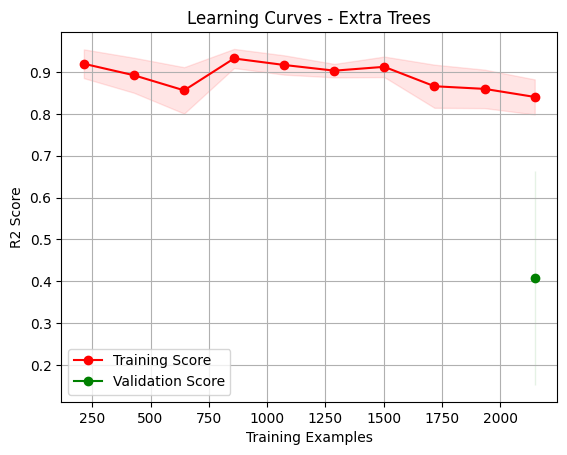

In [82]:
import pickle
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Préparation des données
X = df[['LargestPropertyUseTypeGFA', 'PrimaryPropertyType']].copy()
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Ajouter une petite constante aux colonnes avant d'appliquer le logarithme
X[['LargestPropertyUseTypeGFA']] += 0.01

# Drop les NaN values du dataset
df = pd.concat([X, y], axis=1).dropna()
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

# Preprocessing steps
log_transformer = FunctionTransformer(np.log, validate=True)
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()

# Set up ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['LargestPropertyUseTypeGFA']),
        ('one_hot', one_hot_encoder, ['PrimaryPropertyType'])
    ])

# Models and their param grids
models = [
    ("Extra Trees", ExtraTreesRegressor(), {'model__estimator__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500],
                                            'model__estimator__max_depth': [None, 5, 10, 15, 20, 25, 30]})
]

# To store results
results = []

# Variables to track best model
best_test_score = -np.inf
best_model = None

# Shuffle split configuration
n_splits = 5
test_size = 0.2
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

# Loop over models
for name, model, params in models:
    # Loop over shuffle splits
    for train_index, test_index in shuffle_split.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                   ('scaler', scaler), 
                                   ('model', MultiOutputRegressor(model))])  # wrap your model with MultiOutputRegressor
    
        # RandomizedSearchCV
        random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=5, cv=5, random_state=42)
        random_search.fit(X_train, y_train)

        # Best model and parameters
        best_model = random_search.best_estimator_
        
        # Fit the model on the training data
        best_model.fit(X_train, y_train)

        # Predict on training and testing data
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate R2 scores and RMSE for each target separately
        for i, target in enumerate(y.columns):
            r2_train = r2_score(y_train.iloc[:, i], y_train_pred[:, i])
            r2_test = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
            rmse_train = mean_squared_error(y_train.iloc[:, i], y_train_pred[:, i], squared=False)
            rmse_test = mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i], squared=False)
            print(f"Model: {name}")
            print(f"Target: {target}")
            print(f"R2 Score (Training): {r2_train}")
            print(f"R2 Score (Testing): {r2_test}")
            print(f"RMSE (Training): {rmse_train}")
            print(f"RMSE (Testing): {rmse_test}")
            print("------------------------")
            results.append([name, target, r2_train, rmse_train, r2_test, rmse_test])

            # Check if the current model has a better test score
            if r2_test > best_test_score:
                best_test_score = r2_test
                best_model = best_model

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results, columns=['Model', 'Target', 'R2 Score (Training)', 'RMSE (Training)', 'R2 Score (Testing)', 'RMSE (Testing)'])

print(results_df)

# Save the best model
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'best_scaler.pkl')

# Learning curves
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title(f"Learning Curves - {name}")
plt.xlabel("Training Examples")
plt.ylabel("R2 Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Score")
plt.legend(loc="best")
plt.show()

In [2]:
import pickle
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Préparation des données
X = df[['LargestPropertyUseTypeGFA', 'PrimaryPropertyType']].copy()
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Ajouter une petite constante aux colonnes avant d'appliquer le logarithme
X[['LargestPropertyUseTypeGFA']] += 0.01

# Drop les NaN values du dataset
df = pd.concat([X, y], axis=1).dropna()
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

# Preprocessing steps
log_transformer = FunctionTransformer(np.log, validate=True)
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()

# Set up ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['LargestPropertyUseTypeGFA']),
        ('one_hot', one_hot_encoder, ['PrimaryPropertyType'])
    ])

# Models and their param grids
models = [
    ("Extra Trees", ExtraTreesRegressor(), {'model__estimator__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500],
                                            'model__estimator__max_depth': [None, 5, 10, 15, 20, 25, 30]})
]

# Variables pour suivre le meilleur modèle
best_test_score = -np.inf  # Initialisez la meilleure précision du test à -inf
best_model = None  # Initialisez le meilleur modèle à None
best_scaler = None  # Initialisez le meilleur scaler à None
best_avg_test_score = -np.inf # Initialisez la meilleure précision moyenne du test à -inf

# Pour stocker les résultats
results = []

# Shuffle split configuration
n_splits = 5
test_size = 0.2
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

# Loop over models
for name, model, params in models:
    # Loop over shuffle splits
    for train_index, test_index in shuffle_split.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                   ('scaler', scaler), 
                                   ('model', MultiOutputRegressor(model))])  # wrap your model with MultiOutputRegressor
    
        # RandomizedSearchCV
        random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=10, cv=5, random_state=42)
        random_search.fit(X_train, y_train)

        # Best model and parameters
        best_model = random_search.best_estimator_

        # Predict on training and testing data
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        for i, target in enumerate(y.columns):
            r2_train = r2_score(y_train.iloc[:, i], y_train_pred[:, i])
            r2_test = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
            rmse_train = mean_squared_error(y_train.iloc[:, i], y_train_pred[:, i], squared=False)
            rmse_test = mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i], squared=False)

            results.append([name, target, r2_train, rmse_train, r2_test, rmse_test])

        # Calculez la moyenne des scores de test pour les deux cibles
        avg_test_score = np.mean([result[-2] for result in results[-2:]])

        # Vérifiez si la moyenne des scores de test est meilleure que la meilleure précédente
        if avg_test_score > best_avg_test_score:
            best_avg_test_score = avg_test_score
            best_model = random_search.best_estimator_  # Sauvegardez le modèle actuel comme meilleur modèle
            best_scaler = scaler  # Sauvegardez le scaler correspondant


# Créez un DataFrame à partir de la liste de résultats
results_df = pd.DataFrame(results, columns=['Model', 'Target', 'R2 Score (Training)', 'RMSE (Training)', 'R2 Score (Testing)', 'RMSE (Testing)'])

print(f"Best model average R2 Score (Testing): {best_avg_test_score}")

# Affichez les résultats
print(results_df)

# Affichez le meilleur modèle et son score

print(f"\nBest model: {best_model}")

scaler.fit(X_train[['LargestPropertyUseTypeGFA']])

# Enregistrez le meilleur modèle et son scaler correspondant
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(best_scaler, 'best_scaler.pkl')

Best model average R2 Score (Testing): 0.8419238420542877
         Model               Target  R2 Score (Training)  RMSE (Training)  \
0  Extra Trees  SiteEnergyUse(kBtu)             0.998268     9.150063e+05   
1  Extra Trees    TotalGHGEmissions             0.994667     3.878954e+01   
2  Extra Trees  SiteEnergyUse(kBtu)             0.885212     7.764032e+06   
3  Extra Trees    TotalGHGEmissions             0.871268     1.915594e+02   
4  Extra Trees  SiteEnergyUse(kBtu)             0.753258     7.040442e+06   
5  Extra Trees    TotalGHGEmissions             0.874367     1.542472e+02   
6  Extra Trees  SiteEnergyUse(kBtu)             0.998304     8.883056e+05   
7  Extra Trees    TotalGHGEmissions             0.993571     3.658869e+01   
8  Extra Trees  SiteEnergyUse(kBtu)             0.789532     7.375783e+06   
9  Extra Trees    TotalGHGEmissions             0.885630     1.748390e+02   

   R2 Score (Testing)  RMSE (Testing)  
0            0.552055    1.356271e+07  
1            0

['best_scaler.pkl']

In [3]:
print(X_train.columns)

Index(['LargestPropertyUseTypeGFA', 'PrimaryPropertyType'], dtype='object')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

print(data.columns)


Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

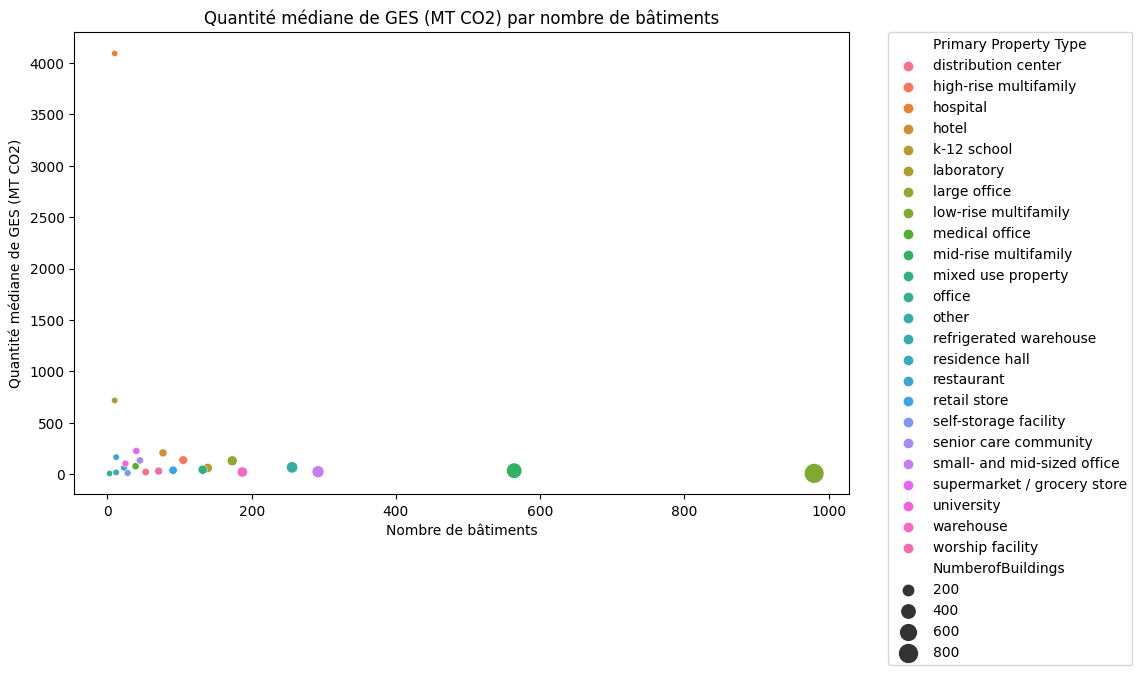

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Nettoyer les données si nécessaire
data = data.dropna(subset=['TotalGHGEmissions', 'PrimaryPropertyType'])

# Convertir les types de bâtiments en minuscules et supprimer les espaces supplémentaires
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].str.lower().str.strip()

# Grouper les données par type de bâtiment
grouped_data = data.groupby('PrimaryPropertyType')

# Calculer le nombre de bâtiments et la médiane des émissions de GHG pour chaque groupe
plot_data = grouped_data.agg(NumberofBuildings=('PrimaryPropertyType', 'count'), MedianGHG=('TotalGHGEmissions', 'median')).reset_index()

# Créer le graphique à bulles
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=plot_data, x='NumberofBuildings', y='MedianGHG', size='NumberofBuildings', hue='PrimaryPropertyType', sizes=(20, 200))

# Afficher la légende sans les tailles des points
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[1:], labels=labels[1:], title='Primary Property Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Quantité médiane de GES (MT CO2) par nombre de bâtiments')
plt.xlabel('Nombre de bâtiments')
plt.ylabel('Quantité médiane de GES (MT CO2)')
plt.show()


In [15]:
import pickle
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Calculer le nombre de bâtiments pour chaque type de propriété
df['NumberofBuildings'] = df.groupby('PrimaryPropertyType')['PrimaryPropertyType'].transform('count')

# Préparation des données
X = df[['LargestPropertyUseTypeGFA', 'PrimaryPropertyType', 'NumberofBuildings']].copy()
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Ajouter une petite constante aux colonnes avant d'appliquer le logarithme
X[['LargestPropertyUseTypeGFA']] += 0.01

# Drop les NaN values du dataset
df = pd.concat([X, y], axis=1).dropna()
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

# Preprocessing steps
log_transformer = FunctionTransformer(np.log, validate=True)
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()

# Set up ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['LargestPropertyUseTypeGFA']),
        ('one_hot', one_hot_encoder, ['PrimaryPropertyType'])
    ])

# Models and their param grids
models = [
    ("Extra Trees", ExtraTreesRegressor(), {'model__estimator__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500],
                                            'model__estimator__max_depth': [None, 5, 10, 15, 20, 25, 30]})
]

# Variables pour suivre le meilleur modèle
best_test_score = -np.inf  # Initialisez la meilleure précision du test à -inf
best_model = None  # Initialisez le meilleur modèle à None
best_scaler = None  # Initialisez le meilleur scaler à None
best_avg_test_score = -np.inf # Initialisez la meilleure précision moyenne du test à -inf

# Pour stocker les résultats
results = []

# Shuffle split configuration
n_splits = 5
test_size = 0.2
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

# Loop over models
for name, model, params in models:
    # Loop over shuffle splits
    for train_index, test_index in shuffle_split.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                   ('scaler', scaler), 
                                   ('model', MultiOutputRegressor(model))])  # wrap your model with MultiOutputRegressor
    
        # RandomizedSearchCV
        random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=3, cv=5, random_state=42)
        random_search.fit(X_train, y_train)

        # Best model and parameters
        best_model = random_search.best_estimator_

        # Predict on training and testing data
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        for i, target in enumerate(y.columns):
            r2_train = r2_score(y_train.iloc[:, i], y_train_pred[:, i])
            r2_test = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
            rmse_train = mean_squared_error(y_train.iloc[:, i], y_train_pred[:, i], squared=False)
            rmse_test = mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i], squared=False)

            results.append([name, target, r2_train, rmse_train, r2_test, rmse_test])

        # Calculez la moyenne des scores de test pour les deux cibles
        avg_test_score = np.mean([result[-2] for result in results[-2:]])

        # Vérifiez si la moyenne des scores de test est meilleure que la meilleure précédente
        if avg_test_score > best_avg_test_score:
            best_avg_test_score = avg_test_score
            best_model = random_search.best_estimator_  # Sauvegardez le modèle actuel comme meilleur modèle
            best_scaler = scaler  # Sauvegardez le scaler correspondant


# Créez un DataFrame à partir de la liste de résultats
results_df = pd.DataFrame(results, columns=['Model', 'Target', 'R2 Score (Training)', 'RMSE (Training)', 'R2 Score (Testing)', 'RMSE (Testing)'])

print(f"Best model average R2 Score (Testing): {best_avg_test_score}")

# Affichez les résultats
print(results_df)

# Affichez le meilleur modèle et son score

print(f"\nBest model: {best_model}")

scaler.fit(X_train[['LargestPropertyUseTypeGFA']])

# Enregistrez le meilleur modèle et son scaler correspondant
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(best_scaler, 'best_scaler.pkl')

Best model average R2 Score (Testing): 0.8206098802147477
         Model               Target  R2 Score (Training)  RMSE (Training)  \
0  Extra Trees  SiteEnergyUse(kBtu)             0.998415     8.753025e+05   
1  Extra Trees    TotalGHGEmissions             0.994719     3.860007e+01   
2  Extra Trees  SiteEnergyUse(kBtu)             0.959935     4.586916e+06   
3  Extra Trees    TotalGHGEmissions             0.965381     9.933874e+01   
4  Extra Trees  SiteEnergyUse(kBtu)             0.919395     4.024007e+06   
5  Extra Trees    TotalGHGEmissions             0.953003     9.434060e+01   
6  Extra Trees  SiteEnergyUse(kBtu)             0.998376     8.691522e+05   
7  Extra Trees    TotalGHGEmissions             0.994049     3.520241e+01   
8  Extra Trees  SiteEnergyUse(kBtu)             0.932624     4.173173e+06   
9  Extra Trees    TotalGHGEmissions             0.961715     1.011567e+02   

   R2 Score (Testing)  RMSE (Testing)  
0            0.616988    1.254124e+07  
1            0

['best_scaler.pkl']